### Descargar imágenes

In [ ]:
import os
if os.path.exists('Imagenes'):   
    print ('La carpeta ya existe')
else:
    os.system('wget -nc https://www.dropbox.com/s/i80af08mp0y5ux5/Imagenes.zip?dl=1')
    os.system('unzip Imagenes.zip?dl=1')
    os.system('rm -r Imagenes.zip?dl=1')
    print('ImAgenes descargadas')

### Cargar las librerías

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

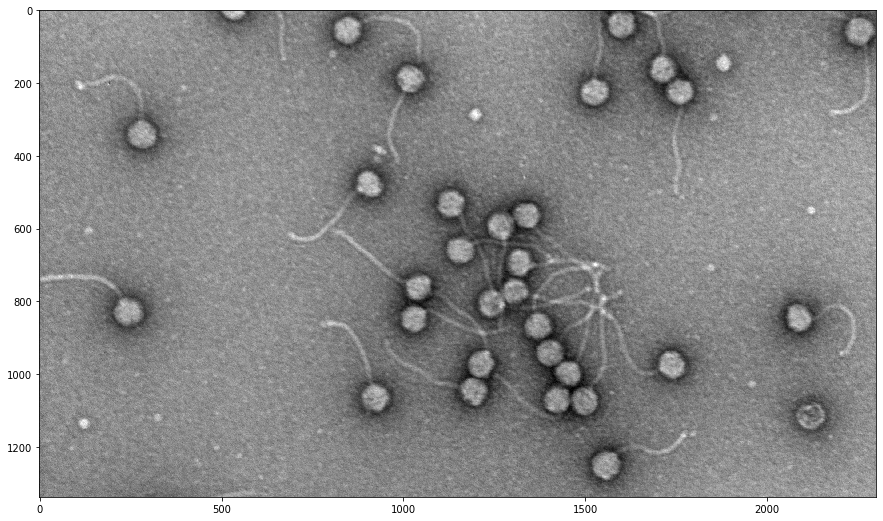

In [2]:
ima = cv2.imread("C:/Users/SANTIAGO/PDI Procesamiento Digital de Imagenes/Unidad 3 - OpenCV/Datasets/1/circ.jpg")

ima=cv2.cvtColor(ima,cv2.COLOR_BGR2RGB)
img=cv2.cvtColor(ima, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(15,9))
plt.imshow(ima)

As you know, a line in the image space can be expressed with two variables. For example:

- In the Cartesian coordinate system: Parameters: (m,b).
- In the Polar coordinate system: Parameters: (r,θ)

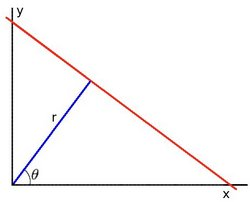



### Hough Line Transform

For Hough Transforms, we will express lines in the Polar system. 

Hence, a line equation can be written as:

 y =(−cosθ/sinθ)x+(r/sinθ)

Arranging the terms: r = xcosθ + ysinθ

In general for each point (x0,y0), we can define the family of lines that goes through that point as:

 rθ=x0⋅cosθ+y0⋅sinθ

Meaning that each pair (rθ,θ) represents each line that passes by (x0,y0).

If for a given (x0,y0) we plot the family of lines that goes through it, we get a sinusoid. 

For instance, for x0=8 and y0=6 we get the following plot (in a plane θ - r):

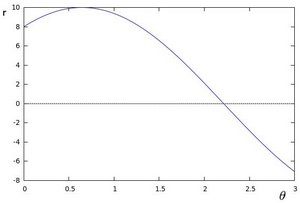

We consider only points such that r>0 and 0<θ<2π.



We can do the same operation above for all the points in an image. 

If the curves of two different points intersect in the plane θ - r, that means that both points belong to a same line. 

For instance, following with the example above and drawing the plot for two more points: x1=4, y1=9 and x2=12, y2=3, we get:

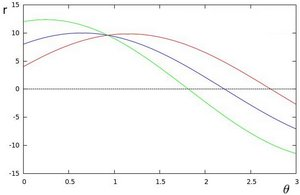

The three plots intersect in one single point (0.925,9.6), these coordinates are the parameters ( θ,r) or the line in which (x0,y0), (x1,y1) and (x2,y2) lay.

In general, a line can be detected by finding the number of intersections between curves.

The more curves intersecting means that the line represented by that intersection have more points. 

In general, we can define a threshold of the minimum number of intersections needed to detect a line.

This is what the Hough Line Transform does. It keeps track of the intersection between curves of every point in the image. 

- If the number of intersections is above some threshold, then it declares it as a line with the parameters (θ,rθ) of the intersection point.

### Transformada Hough Círculos
Un círculo se representa matemáticamente como $(x-x_{center})^2 + (y - y_{center})^2 = r^2$ donde ($x_{center}$,$y_{center}$) es el centro del círculo, y $r$ es el radio del círculo.

A partir de la ecuación, podemos ver que tenemos 3 parámetros, por lo que necesitamos un acumulador 3D para la transformada de Hough, que sería altamente ineficaz. 

Así que OpenCV usa un método más complicado, el Método Hough Gradient, que utiliza la información de degradado de los bordes.

```
cv2.HoughCircles(ImagenGris,
                    Método,
                    Relación acumulador-Imagen,
                    Distancia mínima entre circulos, 
                    param1 = UmbralCanny superior, 
                    param2 = Umbral del acumulador,
                    minRadius = Radio mínimo,
                    maxRadius = Radio máximo)

with the arguments:
      gray: Input image (grayscale).
      circles: A vector that stores sets of 3 values: xc,yc,r for each detected circle.
      HOUGH_GRADIENT: Define the detection method. Currently this is the only one available in OpenCV.
      dp = 1: The inverse ratio of resolution.
      min_dist = gray.rows/16: Minimum distance between detected centers.
      param_1 = 200: Upper threshold for the internal Canny edge detector.
      param_2 = 100*: Threshold for center detection.
      min_radius = 0: Minimum radius to be detected. If unknown, put zero as default.
      max_radius = 0: Maximum radius to be detected. If unknown, put zero as default.

```

Nota: La implementación en OpenCV de este algoritmo trae internamente el uso del algoritmo de Canny.

In [5]:
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,3,40,param1=150,param2=150,minRadius=20,maxRadius=58)
print (np.shape(circles))
circles = np.uint16(np.around(circles))

(1, 31, 3)


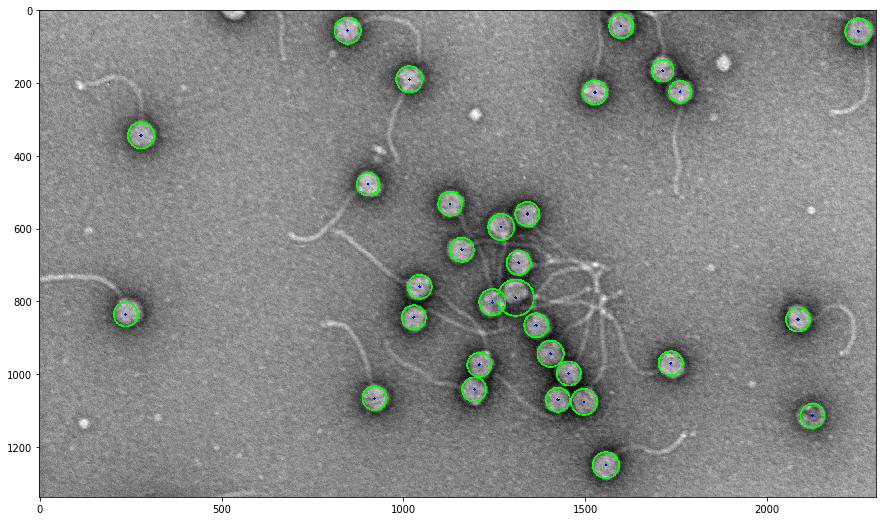

In [6]:
imx=ima.copy()
for i in circles[0,:]:
    # Dibuja la circusnferencia del círculo
    cv2.circle(imx,(i[0],i[1]),i[2],(0,255,0),3)
    # dibuja el centro del círculo
    cv2.circle(imx,(i[0],i[1]),2,(0,0,255),3)
plt.figure(figsize=(15,9))
plt.imshow(imx)